### 1. Data Inspection & Transformation 

In [1]:
import pandas as pd

runways = pd.read_csv("KATL_runways.csv")
runways.head()

,gufi,timestamp,departure_runway_actual,departure_runway_actual_time,arrival_runway_actual,arrival_runway_actual_time
0,EDV4920.AGS.ATL.211030.1945.0071.TFM,2021-11-01 00:01:17,NaN,NaN,27L,2021-11-01 00:01:17
1,DAL2695.IAH.ATL.211030.2205.0031.TFM,2021-11-01 00:02:18,NaN,NaN,27L,2021-11-01 00:02:18
2,BAW7TG.LHR.ATL.211030.1442.0099.TFM,2021-11-01 00:03:48,NaN,NaN,27L,2021-11-01 00:03:48
3,DAL1253.MSN.ATL.211030.2230.0075.TFM,2021-11-01 00:08:40,NaN,NaN,26R,2021-11-01 00:08:40
4,DAL1510.MSY.ATL.211030.2300.0080.TFM,2021-11-01 00:10:20,NaN,NaN,27L,2021-11-01 00:10:20


We need the departure runway actual time (The time that the flight departed from the runway) to calculate how long it took from the start of pushback time to take off.

In [2]:
runways = runways[["gufi","departure_runway_actual_time"]]
runways.head()

,gufi,departure_runway_actual_time
0,EDV4920.AGS.ATL.211030.1945.0071.TFM,NaN
1,DAL2695.IAH.ATL.211030.2205.0031.TFM,NaN
2,BAW7TG.LHR.ATL.211030.1442.0099.TFM,NaN
3,DAL1253.MSN.ATL.211030.2230.0075.TFM,NaN
4,DAL1510.MSY.ATL.211030.2300.0080.TFM,NaN


In [3]:
# this is the weather data, which was disregard in the research
lamp = pd.read_csv("KATL_lamp.csv")

In [4]:
lamp.head()

,timestamp,forecast_timestamp,temperature,wind_direction,wind_speed,wind_gust,cloud_ceiling,visibility,cloud,lightning_prob,precip
0,2021-11-04 00:30:00,2021-11-04 01:00:00,53,6,10,0,7.0,7,OV,N,False
1,2021-11-09 00:30:00,2021-11-09 01:00:00,62,31,3,0,8.0,7,CL,N,False
2,2021-11-09 00:30:00,2021-11-09 02:00:00,59,32,2,0,8.0,7,CL,N,False
3,2021-11-09 00:30:00,2021-11-09 03:00:00,57,31,1,0,8.0,7,CL,N,False
4,2021-11-09 00:30:00,2021-11-09 04:00:00,56,29,1,0,8.0,7,CL,N,False


In [5]:
standtimes = pd.read_csv("KATL_standtimes.csv")
standtimes.head()

,gufi,timestamp,arrival_stand_actual_time,departure_stand_actual_time
0,DAL2150.ATL.TPA.211031.1505.0091.TFM,2021-11-01 16:19:00,2021-11-01 16:19:00,2021-11-01 15:02:00
1,EDV4642.CHO.ATL.211031.2200.0104.TFM,2021-11-01 23:42:00,2021-11-01 23:42:00,2021-11-01 21:57:00
2,DAL2721.ATL.GSP.211031.1210.0073.TFM,2021-11-01 12:54:00,2021-11-01 12:54:00,2021-11-01 12:05:00
3,EDV5418.ATL.BTR.211031.1210.0122.TFM,2021-11-01 13:41:00,2021-11-01 13:41:00,2021-11-01 12:08:00
4,DAL1554.IND.ATL.211031.1700.0173.TFM,2021-11-01 18:14:00,2021-11-01 18:14:00,2021-11-01 16:55:00


We need to extract the data for departure_stand_actual_time which is the time the flight departed the gate (the pushback time)

In [6]:
standtimes = standtimes[["gufi","departure_stand_actual_time"]]

In [7]:
mfs = pd.read_csv("KCLT_mfs.csv.bz2", compression="bz2")
mfs.head()

,gufi,aircraft_engine_class,aircraft_type,major_carrier,flight_type,isdeparture
0,A6RTS.CLT.MMU.210704.2123.0016.TFM,JET,F900,NaN,GENERAL_AVIATION,True
1,A6RTS.CLT.TEB.210708.1609.0025.TFM,JET,F900,NaN,GENERAL_AVIATION,True
2,A6RTS.MMU.CLT.210706.1715.0025.TFM,JET,F900,NaN,GENERAL_AVIATION,False
3,A6RTS.TEB.CLT.210704.2120.0003.TFM,JET,F900,NaN,GENERAL_AVIATION,False
4,AA2998.UNKN.CLT.221130.1828.0030.TFM,JET,A321,NaN,GENERAL_AVIATION,False


In [8]:
# mfs contains informations such as aircraft_type and major_carrier, which were decided to be important
mfs = mfs[mfs["isdeparture"] == True]
mfs.head()

,gufi,aircraft_engine_class,aircraft_type,major_carrier,flight_type,isdeparture
0,A6RTS.CLT.MMU.210704.2123.0016.TFM,JET,F900,NaN,GENERAL_AVIATION,True
1,A6RTS.CLT.TEB.210708.1609.0025.TFM,JET,F900,NaN,GENERAL_AVIATION,True
8,AAL1003.CLT.CHS.221129.1930.0160.TFM,JET,B738,AAL,SCHEDULED_AIR_TRANSPORT,True
9,AAL1003.CLT.CHS.221130.1930.0153.TFM,JET,B738,AAL,SCHEDULED_AIR_TRANSPORT,True
280,AAL1005.CLT.LAS.210816.1259.0076.TFM,JET,A321,AAL,SCHEDULED_AIR_TRANSPORT,True


In [9]:
from functools import reduce

#define list of DataFrames
dfs = [runways, standtimes, mfs]

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['gufi'],
                                            how='outer'), dfs)

In [10]:
final_df.head()

,gufi,departure_runway_actual_time,departure_stand_actual_time,aircraft_engine_class,aircraft_type,major_carrier,flight_type,isdeparture
0,EDV4920.AGS.ATL.211030.1945.0071.TFM,NaN,2021-10-31 23:16:00,NaN,NaN,NaN,NaN,NaN
1,DAL2695.IAH.ATL.211030.2205.0031.TFM,NaN,2021-10-31 22:20:00,NaN,NaN,NaN,NaN,NaN
2,BAW7TG.LHR.ATL.211030.1442.0099.TFM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DAL1253.MSN.ATL.211030.2230.0075.TFM,NaN,2021-10-31 22:20:00,NaN,NaN,NaN,NaN,NaN
4,DAL1510.MSY.ATL.211030.2300.0080.TFM,NaN,2021-10-31 23:04:00,NaN,NaN,NaN,NaN,NaN


Implementing dropna was not successful; maintain highly important features based on the paper drop everything else. is departure is already sorted as only NaN and True, so we can just delete the column as well. Also, having NaN value for aircraft type and major carrier is fine, while missing departure runway and stand actual time is not.

In [21]:
final_df = final_df[["gufi","departure_runway_actual_time",
                     "departure_stand_actual_time","aircraft_type","major_carrier"]]
final_df = final_df.dropna(subset=['departure_runway_actual_time', 'departure_stand_actual_time'])
final_df = final_df.reset_index(drop = True)
final_df.head()

,gufi,departure_runway_actual_time,departure_stand_actual_time,aircraft_type,major_carrier
0,EDV5176.ATL.XNA.211107.2030.0162.TFM,2021-11-08 20:38:39,2021-11-08 20:26:00,NaN,NaN
1,SWA4644.ATL.HOU.211031.2241.0013.TFM,2021-11-01 00:00:44,2021-10-31 23:44:00,NaN,NaN
2,SWA3658.ATL.SDF.211030.2335.0123.TFM,2021-11-01 00:01:34,2021-10-31 23:47:00,NaN,NaN
3,SWA3845.ATL.JAN.211030.2340.0115.TFM,2021-11-01 00:02:21,2021-10-31 23:46:00,NaN,NaN
4,SWA3964.ATL.PHX.211030.2340.0116.TFM,2021-11-01 00:03:45,2021-10-31 23:46:00,NaN,NaN


Now get the total taxi out time by subtracting from runway actual time - stand actual time. If it is negative, it a is wrong value, so disregard. 

In [12]:
from datetime import datetime

secs_lst = []
mins_lst = []

for i in range(len(final_df["gufi"])):
    stand = datetime.strptime(final_df["departure_stand_actual_time"][i], "%Y-%m-%d %H:%M:%S")
    runway = datetime.strptime(final_df["departure_runway_actual_time"][i], "%Y-%m-%d %H:%M:%S")
    secs = int((runway - stand).total_seconds())
    mins = round(secs/60,2)
    if secs < 0:
        secs_lst.append(0)
        mins_lst.append(0)
    else:
        secs_lst.append(secs)
        mins_lst.append(mins)
        

final_df["total_taxi_out_time_sec"] = secs_lst
final_df["total_taxi_out_time_min"] = mins_lst

final_df = final_df[final_df["total_taxi_out_time_sec"] != 0]

final_df.head()

,gufi,departure_runway_actual_time,departure_stand_actual_time,aircraft_type,major_carrier,total_taxi_out_time_sec,total_taxi_out_time_min
0,EDV5176.ATL.XNA.211107.2030.0162.TFM,2021-11-08 20:38:39,2021-11-08 20:26:00,NaN,NaN,759,12.65
1,SWA4644.ATL.HOU.211031.2241.0013.TFM,2021-11-01 00:00:44,2021-10-31 23:44:00,NaN,NaN,1004,16.73
2,SWA3658.ATL.SDF.211030.2335.0123.TFM,2021-11-01 00:01:34,2021-10-31 23:47:00,NaN,NaN,874,14.57
3,SWA3845.ATL.JAN.211030.2340.0115.TFM,2021-11-01 00:02:21,2021-10-31 23:46:00,NaN,NaN,981,16.35
4,SWA3964.ATL.PHX.211030.2340.0116.TFM,2021-11-01 00:03:45,2021-10-31 23:46:00,NaN,NaN,1065,17.75


In [13]:
final_df["total_taxi_out_time_min"].describe()

count    583735.000000
mean         15.931833
std           8.447546
min           0.020000
25%          11.930000
50%          14.350000
75%          17.730000
max        1024.300000
Name: total_taxi_out_time_min, dtype: float64

As from description and boxplot, most of the data are focused around 15 while there is a tail that extends to 1000s. Since taking over a 1000 minutes for a flight to take off is extreme case, we decided to remove those several extreme outliers using iqr.

In [14]:
final_df = final_df.reset_index(drop=True)

In [15]:
# this is to merge lamp data
from datetime import datetime, timedelta

def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))
                  
rounded_time = []

for i in range(len(final_df["gufi"])):
    rounded = hour_rounder(datetime.strptime(final_df["departure_stand_actual_time"][i], "%Y-%m-%d %H:%M:%S"))
    rounded_time.append(rounded)

final_df["forecast_timestamp"] = rounded_time

In [16]:
final_df.head()

,gufi,departure_runway_actual_time,departure_stand_actual_time,aircraft_type,major_carrier,total_taxi_out_time_sec,total_taxi_out_time_min,forecast_timestamp
0,EDV5176.ATL.XNA.211107.2030.0162.TFM,2021-11-08 20:38:39,2021-11-08 20:26:00,NaN,NaN,759,12.65,2021-11-08 20:00:00
1,SWA4644.ATL.HOU.211031.2241.0013.TFM,2021-11-01 00:00:44,2021-10-31 23:44:00,NaN,NaN,1004,16.73,2021-11-01 00:00:00
2,SWA3658.ATL.SDF.211030.2335.0123.TFM,2021-11-01 00:01:34,2021-10-31 23:47:00,NaN,NaN,874,14.57,2021-11-01 00:00:00
3,SWA3845.ATL.JAN.211030.2340.0115.TFM,2021-11-01 00:02:21,2021-10-31 23:46:00,NaN,NaN,981,16.35,2021-11-01 00:00:00
4,SWA3964.ATL.PHX.211030.2340.0116.TFM,2021-11-01 00:03:45,2021-10-31 23:46:00,NaN,NaN,1065,17.75,2021-11-01 00:00:00


In [17]:
def totime(s):
    time = datetime.strptime(s, "%Y-%m-%d %H:%M:%S")
    return time

lamp["forecast_timestamp"] = lamp["forecast_timestamp"].apply(totime)
lamp = lamp.drop(["timestamp"],axis =1)
lamp = lamp.drop_duplicates(subset=['forecast_timestamp'])
new_final_df = pd.merge(final_df, lamp, on="forecast_timestamp", how="left")

In [18]:
new_final_df = new_final_df.drop_duplicates()

In [20]:
len(new_final_df)

583735

In [19]:
temp = new_final_df[['aircraft_type','major_carrier','cloud','lightning_prob','precip']].copy()

for col in temp.columns:
    print(col,':',len(temp[col].unique()),'labels')

aircraft_type : 1 labels
major_carrier : 1 labels
cloud : 6 labels
lightning_prob : 5 labels
precip : 3 labels


In [40]:
new_final_df.head()

,gufi,departure_runway_actual_time,departure_stand_actual_time,aircraft_type,major_carrier,total_taxi_out_time_sec,total_taxi_out_time_min,forecast_timestamp,temperature,wind_direction,wind_speed,wind_gust,cloud_ceiling,visibility,cloud,lightning_prob,precip,outlier
0,EDV5176.ATL.XNA.211107.2030.0162.TFM,2021-11-08 20:38:39,2021-11-08 20:26:00,NaN,NaN,759,12.65,2021-11-08 20:00:00,74.0,29.0,5.0,0.0,8.0,7.0,FW,N,False,False
1,SWA4644.ATL.HOU.211031.2241.0013.TFM,2021-11-01 00:00:44,2021-10-31 23:44:00,NaN,NaN,1004,16.73,2021-11-01 00:00:00,57.0,31.0,7.0,0.0,8.0,7.0,CL,N,False,False
2,SWA3658.ATL.SDF.211030.2335.0123.TFM,2021-11-01 00:01:34,2021-10-31 23:47:00,NaN,NaN,874,14.57,2021-11-01 00:00:00,57.0,31.0,7.0,0.0,8.0,7.0,CL,N,False,False
3,SWA3845.ATL.JAN.211030.2340.0115.TFM,2021-11-01 00:02:21,2021-10-31 23:46:00,NaN,NaN,981,16.35,2021-11-01 00:00:00,57.0,31.0,7.0,0.0,8.0,7.0,CL,N,False,False
4,SWA3964.ATL.PHX.211030.2340.0116.TFM,2021-11-01 00:03:45,2021-10-31 23:46:00,NaN,NaN,1065,17.75,2021-11-01 00:00:00,57.0,31.0,7.0,0.0,8.0,7.0,CL,N,False,False


missing major features found after trimming the data: aircraft_type, major_carrier 

⇢ Decided to switch to create classifier model that can predict whether it's going to be an outlier amount late or not based on the weather data

In [39]:
from scipy import stats
import numpy as np

pct25 = new_final_df["total_taxi_out_time_sec"].quantile(0.25)
pct75 = new_final_df["total_taxi_out_time_sec"].quantile(0.75)
iqr = pct75 - pct25

upper_limit = pct75 + 1.5 * iqr
lower_limit = pct25 - 1.5 * iqr

new_final_df["outlier"] = np.where(new_final_df["total_taxi_out_time_sec"] > upper_limit, True, False )

In [41]:
new_final_df["outlier"].describe()

count     583735
unique         2
top        False
freq      554178
Name: outlier, dtype: object

In [23]:
final_df["total_taxi_out_time_min"].describe()

count    583735.000000
mean         15.931833
std           8.447546
min           0.020000
25%          11.930000
50%          14.350000
75%          17.730000
max        1024.300000
Name: total_taxi_out_time_min, dtype: float64

<AxesSubplot: >

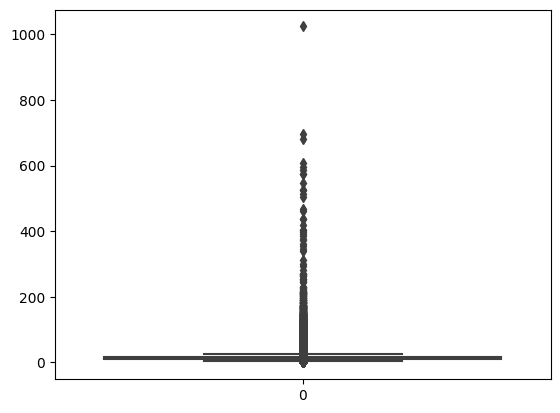

In [27]:
import seaborn as sns
sns.boxplot(new_final_df['total_taxi_out_time_min'])

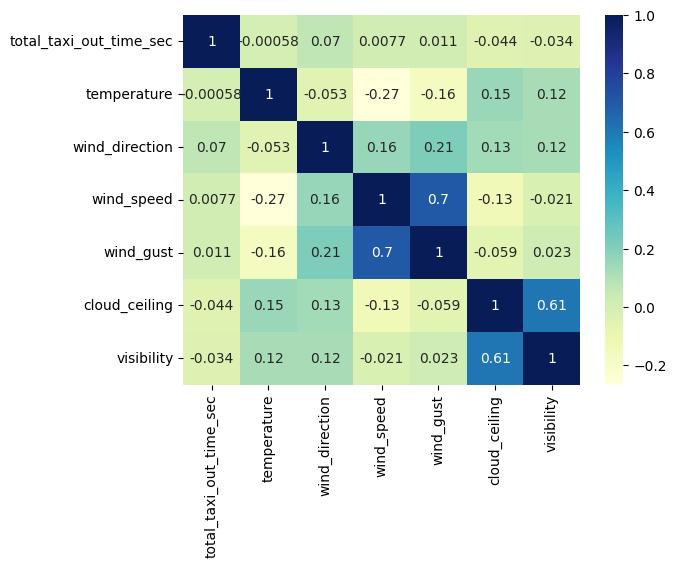

In [25]:
data = new_final_df[["total_taxi_out_time_sec","temperature",
                     "wind_direction","wind_speed","wind_gust",
                     "cloud_ceiling","visibility"]].copy()

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

plt.show()

In [42]:
label = new_final_df["outlier"].copy()
features_cat = new_final_df[["cloud","lightning_prob","precip"]].copy()
features_cont = new_final_df[["temperature","wind_direction","wind_speed",
                         "wind_gust","cloud_ceiling","visibility"]].copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_columns = features_cont.columns

features_cont[all_columns] = scaler.fit_transform(features_cont[all_columns])
features_cont.head()

features_cat_ohe = pd.get_dummies(data = features_cat)

In [43]:
model_feature = pd.concat([features_cont.reset_index(drop=True),
                           features_cat_ohe.reset_index(drop=True)], axis=1)

model_feature.head()

,temperature,wind_direction,wind_speed,wind_gust,cloud_ceiling,visibility,cloud_BK,cloud_CL,cloud_FW,cloud_OV,cloud_SC,lightning_prob_H,lightning_prob_L,lightning_prob_M,lightning_prob_N,precip_False,precip_True
0,0.591766,0.852185,-0.617724,-0.360853,0.66215,0.274292,0,0,1,0,0,0,0,0,1,1,0
1,-0.618306,1.058107,-0.034230,-0.360853,0.66215,0.274292,0,1,0,0,0,0,0,0,1,1,0
2,-0.618306,1.058107,-0.034230,-0.360853,0.66215,0.274292,0,1,0,0,0,0,0,0,1,1,0
3,-0.618306,1.058107,-0.034230,-0.360853,0.66215,0.274292,0,1,0,0,0,0,0,0,1,1,0
4,-0.618306,1.058107,-0.034230,-0.360853,0.66215,0.274292,0,1,0,0,0,0,0,0,1,1,0


In [45]:
from sklearn.model_selection import train_test_split

# extract test data and store it in x_test, y_test
features = model_feature.to_numpy()
labels = label.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

In [48]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


hgbc = HistGradientBoostingClassifier(max_bins=10, max_iter=100)
# Train the model
hgbc.fit(x_train,y_train.flatten())
# Evluate the model on training data
y_pred_train = hgbc.predict(x_train)
# Evaluate the model on validation data
y_pred_valid = hgbc.predict(x_test)
# Compute training accuracy
train_acc = accuracy_score(y_train.flatten(), y_pred_train)
# Compute validation accuracy
valid_acc = accuracy_score(y_test.flatten(), y_pred_valid)

print("Model: HistGradientBoostingClassifier")
print(f"training accuracy: {train_acc}")
print(f"validation accuracy: {valid_acc}")

def print_confusion_matrix(y_true, y_pred):
    cm = metrics.confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

print_confusion_matrix(y_test,y_pred_valid)

Model: HistGradientBoostingClassifier
training accuracy: 0.9507881247370855
validation accuracy: 0.9506115736458012
True positive =  55375
False positive =  27
False negative =  2856
True negative =  116


In [51]:
model_feature.columns

Index(['temperature', 'wind_direction', 'wind_speed', 'wind_gust',
       'cloud_ceiling', 'visibility', 'cloud_BK', 'cloud_CL', 'cloud_FW',
       'cloud_OV', 'cloud_SC', 'lightning_prob_H', 'lightning_prob_L',
       'lightning_prob_M', 'lightning_prob_N', 'precip_False', 'precip_True'],
      dtype='object')

In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np

best_model = HistGradientBoostingClassifier(max_bins=10, max_iter=100)

# feature and its no. of columns dictionary
dic = {"NO ABLATION":0, "temperature":1 , "wind_direction": 1, "wind_speed":1,
       "wind_gust":1,"cloud_ceiling":1, "visibility":1,'cloud':5, 'lightning_prob':4, 'precip':2}

keysList = list(dic.keys())

# Let's maintain an accuracy dictionary
accuracy_log = {}

ind = 0

for feature_name in keysList:
    print (f"Removing feature \"{feature_name}\"")
    best_model = HistGradientBoostingClassifier(max_bins=10, max_iter=100)
    step = dic[feature_name]
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)
    x_ablated_train = np.delete(x_train,np.s_[ind:ind+step],axis=1)
    x_ablated_test = np.delete(x_test,np.s_[ind:ind+step],axis=1)
    hgbc.fit(x_ablated_train,y_train.flatten())
    # Evaluate the model on validation data
    y_pred_valid = hgbc.predict(x_ablated_test)
    # Compute validation accuracy
    valid_acc = accuracy_score(y_test.flatten(), y_pred_valid)
    accuracy_log[feature_name] = valid_acc
    ind += step

Removing feature "NO ABLATION"
Removing feature "temperature"
Removing feature "wind_direction"
Removing feature "wind_speed"
Removing feature "wind_gust"
Removing feature "cloud_ceiling"
Removing feature "visibility"
Removing feature "cloud"
Removing feature "lightning_prob"
Removing feature "precip"


In [55]:
# this is to acquire accuracy drop log
acc_drop_log = {}
no_ab_score = accuracy_log["NO ABLATION"]
keys_list = list(accuracy_log.keys())

for x in keys_list:
    value = accuracy_log[x]
    acc_drop_log[x] = no_ab_score - value

acc_drop_log = dict(sorted(acc_drop_log.items(), key=lambda x:x[1],reverse = True))
keys_listt = list(acc_drop_log.keys())

print("FEATURE RANKED BY IMPORTANCE")
for i in range(len(keys_listt)):
    feature_name = keys_listt[i]
    value = acc_drop_log[feature_name]
    
    print(f"{i+1}. {feature_name}, drop: {value}")

FEATURE RANKED BY IMPORTANCE
1. lightning_prob, drop: 0.00035974920341241834
2. precip, drop: 0.00035974920341241834
3. temperature, drop: 0.0003083564600677713
4. visibility, drop: 0.0003083564600677713
5. wind_direction, drop: 0.00025696371672312424
6. cloud_ceiling, drop: 0.00020557097337847718
7. wind_speed, drop: 8.565457224107842e-05
8. NO ABLATION, drop: 0.0
9. wind_gust, drop: -1.7130914448215684e-05
10. cloud, drop: -0.00013704731558572547
